In [1]:
import sys
sys.path.append('../')

In [2]:
from mrl.imports import *
from mrl.core import *
from mrl.chem import *
from mrl.templates import *

/home/dmai/miniconda3/envs/mrl/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterCatalogEntry const> already registered; second conversion method ignored.
  return f(*args, **kwds)


In [3]:
from mrl.torch_imports import *
from mrl.torch_core import *
from mrl.layers import *
from mrl.dataloaders import *
from mrl.g_models import *
from mrl.agent import *

In [4]:
from collections import namedtuple

In [15]:
from typing import Any, NamedTuple

In [29]:
class Node(NamedTuple):
    sample: Any
    score: '0'=None
    

In [30]:
Node('c',)

Node(sample='c', score=None)

In [9]:
t1 = (('ccc', 'c'), 5)
t2 = (('c1c', 'c'), 6)
t3 = (('ccc', 'c'), 5)

In [10]:
set([t1,t2,t3])

{(('c1c', 'c'), 6), (('ccc', 'c'), 5)}

In [14]:
tup = namedtuple('BufferItem', ['sample', 'score'], defaults=(None,None))

TypeError: namedtuple() got an unexpected keyword argument 'defaults'

In [12]:
t1 = tup('cccc', 5)
t2 = tup('c1c', 6)
t3 = tup('cccc', 5)

In [13]:
set([t1,t2,t3])

{BufferItem(sample='c1c', score=6), BufferItem(sample='cccc', score=5)}

In [ ]:
class BufferItem(tuple):
    def __init__(self, sample, score=None)

In [4]:
def permute_attachments(smile):
    atts = smile.count('*')
    
    if atts>1:
        chars = ['[H]' if i=='*' else i for i in smile]
        att_idxs = [i for i in range(len(smile)) if smile[i]=='*']
        outputs = []
        
        for i, idx in enumerate(att_idxs):
            chars_iter = list(chars)
            chars_iter[idx] = '*'
            smile_iter = ''.join(chars_iter)
            smile_iter = canon_smile(smile_iter)
            outputs.append(smile_iter)
            
    else:
        outputs = [smile]
        
    return outputs

In [5]:
# df = pd.read_csv('../../smiles_datasets/single_frags.csv')
df = pd.read_csv('../../smiles_datasets/chembl/chembl.csv')

In [6]:
df.head()

,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,PSA,...,Inorganic Flag,Heavy Atoms,HBA Lipinski,HBD Lipinski,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,smiles,smiles_nc
0,CHEMBL3545610,NaN,NaN,Small molecule,0,379.55,NaN,NaN,4.32,44.37,...,-1,28,4,2,0,379.2624,BASE,C24H33N3O,CN(C)[C@]1(c2ccccc2)CC[C@@H](NC(=O)NCCCc2ccccc...,CN(C)C1(c2ccccc2)CCC(NC(=O)NCCCc2ccccc2)CC1
1,CHEMBL3545637,NaN,NaN,Small molecule,0,346.47,NaN,NaN,4.62,37.05,...,-1,26,3,2,0,346.2045,BASE,C23H26N2O,CN[C@]1(c2ccccc2)CC[C@]2(CC1)OCCc1c3ccccc3[nH]c12,CNC1(c2ccccc2)CCC2(CC1)OCCc1c2[nH]c2ccccc12
2,CHEMBL1193654,NaN,NaN,Small molecule,0,494.63,NaN,NaN,5.43,32.78,...,-1,36,4,0,1,494.2745,NEUTRAL,C30H36F2N2O2,O=C(OCCN1CCN(C(c2ccc(F)cc2)c2ccc(F)cc2)CC1)C12...,O=C(OCCN1CCN(C(c2ccc(F)cc2)c2ccc(F)cc2)CC1)C12...
3,CHEMBL3403355,NaN,NaN,Small molecule,0,293.39,3.0,3.0,2.19,67.15,...,-1,20,5,2,0,293.1198,NEUTRAL,C14H19N3O2S,CCn1c(N[C@H]2CC[C@H](O)CC2)nc2ccsc2c1=O,CCn1c(NC2CCC(O)CC2)nc2ccsc2c1=O
4,CHEMBL3403357,NaN,NaN,Small molecule,0,321.40,3.0,3.0,2.53,84.22,...,-1,22,6,2,0,321.1147,ACID,C15H19N3O3S,CCn1c(N[C@H]2CC[C@H](C(=O)O)CC2)nc2ccsc2c1=O,CCn1c(NC2CCC(C(=O)O)CC2)nc2ccsc2c1=O


In [7]:
df.drop_duplicates(subset='smiles', inplace=True)

In [8]:
df.shape

(2066246, 32)

In [9]:
os.environ['ncpus'] = '60'

In [10]:
chunks = chunk_list(df, 500000)
len(chunks)

5

In [11]:
all_frags = []
for i, chunk in enumerate(chunks):
    frags = fragment_smiles(chunk.smiles.values, [1,2,3,4])
    all_frags += frags
    all_frags = deduplicate_list(all_frags)
    print(i, len(all_frags))
    gc.collect()

0 25743842
1 44781181
2 61240298
3 75974704
4 77799704


In [12]:
df2 = pd.DataFrame(all_frags, columns=['smiles'])

In [13]:
df2

,smiles
0,*Oc1nc(N2CCC(O)CC2)nc(NS(*)(=O)=O)c1*
1,*Cc1oc2ccccc2c1C(=O)c1ccc(OC)cc1
2,*CC(=O)NC(*)C(=O)NCC(=O)NC(C*)C(=O)OCCCl
3,*CC1CN(C(=O)c2cc3cc(OC)ccc3[nH]2)CC(=O)N1Cc1cc...
4,*c1cn(Cc2ncnc(OC(F)F)c2C)c2cc(OC)cnc12
...,...
77799699,*SCc1ccc(C(=O)NCCCOC(*)C)cc1
77799700,*c1cc2c(c3c1CCC(*)(*)O3)CCC(*)(OC)O2
77799701,*C1CCC2(C(=O)OC)CCC3(*)C(CCC4C5(C)CC(=CC)C(=O)...
77799702,*COC(=O)NC(Cc1ccccc1)C(*)CN(Cc1ccccc1)S(=O)(=O...


In [14]:
def count_att(smile):
    return smile.count('*')

In [15]:
df2['attachments'] = maybe_parallel(count_att, df2.smiles.values, cpus=8)

In [16]:
def get_stats(frag):
    mol = to_mol(frag)
    weight = molwt(mol)
    atoms = heavy_atoms(mol)
    return [weight, atoms]

In [17]:
stats = maybe_parallel(get_stats, df2.smiles.values, cpus=64)

In [18]:
stat_df = pd.DataFrame(stats, columns=['weight', 'atoms'])

In [19]:
df2 = pd.concat([df2, stat_df], 1)

In [21]:
df2.head()

,smiles,attachments,weight,atoms
0,*Oc1nc(N2CCC(O)CC2)nc(NS(*)(=O)=O)c1*,3,271.050101,18
1,*Cc1oc2ccccc2c1C(=O)c1ccc(OC)cc1,1,265.086469,20
2,*CC(=O)NC(*)C(=O)NCC(=O)NC(C*)C(=O)OCCCl,3,304.070023,20
3,*CC1CN(C(=O)c2cc3cc(OC)ccc3[nH]2)CC(=O)N1Cc1cc...,2,375.158292,28
4,*c1cn(Cc2ncnc(OC(F)F)c2C)c2cc(OC)cnc12,1,319.100657,23


In [22]:
df = pd.read_csv('../../smiles_datasets/frags.csv')

In [23]:
df.head()

,smiles,attachments,weight,atoms
0,*COC(=O)C(C)(CCCOCC(*)COC(C)=O)C(=O)O*,3,287.113078,20
1,*N(C(=O)c1ccc(I)cc1OC)C(C)C(=O)OCC,1,376.004581,19
2,*CCOCCn1c(C2CC2)nnc1N1CC(C)OC2(CCOC2*)C1,2,334.200491,24
3,*CC(*)Oc1c(F)cc(CN(*)C)cc1O*,4,195.069557,14
4,*OC(=O)c1ccc(NC(=O)CN(*)c2nc3c(*)cccc3s2)cc1,3,324.044287,23


In [24]:
df2.shape, df.shape

((77799704, 4), (106145041, 4))

In [25]:
df = pd.concat([df, df2])

In [26]:
gc.collect()

16

In [27]:
df.head()

,smiles,attachments,weight,atoms
0,*COC(=O)C(C)(CCCOCC(*)COC(C)=O)C(=O)O*,3,287.113078,20
1,*N(C(=O)c1ccc(I)cc1OC)C(C)C(=O)OCC,1,376.004581,19
2,*CCOCCn1c(C2CC2)nnc1N1CC(C)OC2(CCOC2*)C1,2,334.200491,24
3,*CC(*)Oc1c(F)cc(CN(*)C)cc1O*,4,195.069557,14
4,*OC(=O)c1ccc(NC(=O)CN(*)c2nc3c(*)cccc3s2)cc1,3,324.044287,23


In [28]:
df.shape

(183944745, 4)

In [29]:
df.drop_duplicates(subset='smiles', inplace=True)

In [30]:
df.shape

(182354711, 4)

In [31]:
df.attachments.value_counts()

3    55824684
2    52476775
4    45765060
1    28266674
0       21518
Name: attachments, dtype: int64

In [34]:
df = df[df.attachments>0]

In [35]:
df.shape

(182333193, 4)

In [36]:
gc.collect()

0

In [37]:
df.to_csv('../../smiles_datasets/frags.csv', index=False)

In [48]:
single_df = pd.read_csv('../../smiles_datasets/single_frags.csv')

In [49]:
single_df.shape

(4981640, 4)

In [50]:
single_df.weight.max()

203.022344796

In [51]:
single_df.attachments.max()

1

In [52]:
single_df = pd.concat([single_df, df[(df.attachments==1) & (df.weight<=200)]])

In [53]:
single_df.shape

(5993728, 4)

In [54]:
single_df.drop_duplicates(subset='smiles', inplace=True)

In [55]:
single_df.shape

(5262287, 4)

In [56]:
single_df.to_csv('../../smiles_datasets/single_frags.csv', index=False)

In [35]:
single_frags = maybe_parallel(permute_attachments, df.smiles.values, cpus=60)

In [37]:
single_frags = flatten_list_of_lists(single_frags)

In [38]:
len(single_frags)

21106230

In [39]:
df2 = pd.DataFrame(single_frags, columns=['smiles'])

In [40]:
df[df.attachments==1].smiles.isin(df2.smiles).mean()

1.0

In [42]:
df2['attachments'] = maybe_parallel(count_att, df2.smiles.values, cpus=8)

In [43]:
stats = maybe_parallel(get_stats, df2.smiles.values, cpus=64)

In [44]:
stat_df = pd.DataFrame(stats, columns=['weight', 'atoms'])

In [45]:
df2 = pd.concat([df2, stat_df], 1)

In [46]:
gc.collect()

0

In [49]:
df2.drop_duplicates(subset='smiles', inplace=True)

In [50]:
df2

,smiles,attachments,weight,atoms
0,*CCOc1c(O)cc(CNC)cc1F,1,198.093032,14
1,*C(C)Oc1c(O)cc(CNC)cc1F,1,198.093032,14
2,*N(C)Cc1cc(O)c(OCC)c(F)c1,1,198.093032,14
3,*Oc1cc(CNC)cc(F)c1OCC,1,198.093032,14
4,*Oc1cc(O)ncc1C(=O)NCCO,1,197.056232,14
...,...,...,...,...
21101366,*C1(O)CN(c2ccc(C)c(C)c2)C1,1,176.107539,13
21102167,*c1nocc1C(=O)NCC(N)CF,1,186.067880,13
21102984,*COCC(NC(=O)O)C(=O)NO,1,177.051146,12
21104352,*c1nc[nH]c1Nc1cc(C)cnc1C,1,187.098371,14


In [53]:
df2.shape

(4981640, 4)

In [54]:
df2.to_csv('../../smiles_datasets/single_frags.csv', index=False)

<AxesSubplot:>

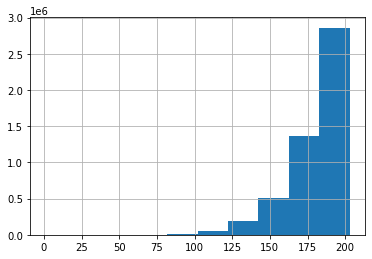

In [55]:
df2.weight.hist()

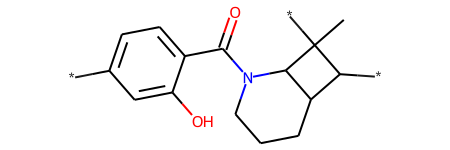

In [22]:
to_mol('*c1ccc(C(=O)N2CCCC3C(*)C(*)(C)C32)c(O)c1')

In [29]:
smile = '*c1ccc(C(=O)N2CCCC3C(*)C(*)(C)C32)c(O)c1'
chars = [i for i in smile]
att_idxs = [i for i in range(len(smile)) if chars[i]=='*']

In [30]:
att_idxs

[0, 21, 25]

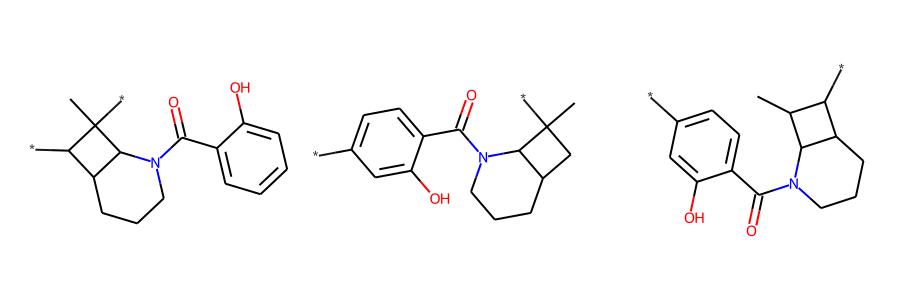

In [37]:
draw_mols([to_mol(i) for i in ['*C1C2CCCN(C(=O)c3ccccc3O)C2C1(*)C',
 '*c1ccc(C(=O)N2CCCC3CC(*)(C)C32)c(O)c1',
 '*c1ccc(C(=O)N2CCCC3C(*)C(C)C32)c(O)c1']])

In [4]:
# df = pd.read_csv('../../smiles_datasets/shard_0.csv', usecols=['smiles'])
df_it = pd.read_csv('../../smiles_datasets/shard_0.csv', usecols=['smiles'], chunksize=2000000)
df = next(df_it)
df = next(df_it)

In [5]:
df.shape

(2000000, 1)

In [7]:
os.environ['ncpus'] = '60'

In [8]:
chunks = chunk_list(df, 200000)
len(chunks)

10

In [9]:
all_frags = []
for i, chunk in enumerate(chunks):
    frags = fragment_smiles(chunk.smiles.values, [1,2,3,4])
    all_frags += frags
    all_frags = deduplicate_list(all_frags)
    print(i, len(all_frags))
    gc.collect()

0 8335894
1 15334920
2 21888459
3 28145769
4 34155835
5 39998192
6 45724829
7 51334188
8 56823386
9 62229470


In [10]:
frag_df = pd.DataFrame(all_frags, columns=['smiles'])

In [11]:
frag_df.shape

(62229470, 1)

In [12]:
def count_att(smile):
    return smile.count('*')

In [13]:
frag_df['attachments'] = maybe_parallel(count_att, frag_df.smiles.values, cpus=8)

In [14]:
frag_df.attachments.value_counts()

2    20467124
3    18692774
1    11697443
4    11372129
Name: attachments, dtype: int64

In [15]:
def get_stats(frag):
    mol = to_mol(frag)
    weight = molwt(mol)
    atoms = heavy_atoms(mol)
    return [weight, atoms]

In [16]:
stats = maybe_parallel(get_stats, frag_df.smiles.values, cpus=64)

In [17]:
stat_df = pd.DataFrame(stats, columns=['weight', 'atoms'])

In [18]:
frag_df = pd.concat([frag_df, stat_df], 1)

In [19]:
frag_df.shape

(62229470, 4)

In [20]:
frag_df.head()

,smiles,attachments,weight,atoms
0,*C#CC(=O)N1CC2CC1C2NC(=O)CC*,2,204.089878,15
1,*C(CN(*)C(=O)Cc1cccc(C2CC2)c1)NC(=O)c1ccco1,2,310.131742,23
2,*CC(CC(=O)NC1CC(NCc2cncn2C)C1)C(*)C,2,276.195011,20
3,*CCNC(=O)C1CCN(c2nnc(CC(*)(C)C)n2Cc2cn(C3COC3)...,2,414.249172,30
4,*OC(*)c1nnc(N(C)Cc2cn(*)nc2C(F)(F)F)n1C,3,287.086819,20


In [21]:
frag_df = frag_df[frag_df.weight<=400]

In [22]:
gc.collect()

0

<AxesSubplot:>

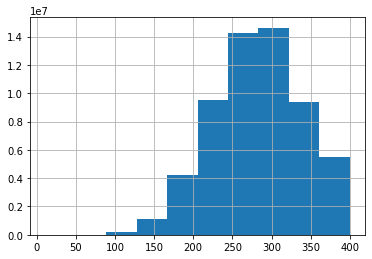

In [23]:
frag_df.weight.hist()

In [24]:
frag_df[frag_df.weight<200]

,smiles,attachments,weight,atoms
9,*CCC(*)NC(C)c1nn(C*)nc1*,4,164.106196,12
16,*CC(NC(=O)N(C)C(*)C*)C(F)F,3,177.083944,12
25,*c1ccc(Nc2ccnc(F)c2)cc1*,2,186.059326,14
30,*C(=O)N1CCC(CNC(=O)C(*)(*)C)C(*)C1,4,194.105528,14
35,*CCC(=O)N1CC(*)C(NC(=O)C(*)(*)F)C1,4,198.080456,14
...,...,...,...,...
62229417,*CCCNC(=O)N1CCC(*)CC(C)C1,2,196.157563,14
62229424,*C(*)NC(=O)NC(*)Cc1ccc(F)cc1,3,193.077716,14
62229425,*CC(=O)NC(C)c1nnc(C)s1,1,184.054458,12
62229426,*Cn1cc(C(=O)N2CCCC2(*)C*)nn1,3,191.093286,14


In [25]:
frag_df.to_csv('../../smiles_datasets/frag_df2.csv', index=False)

In [7]:
from collections import Counter

def to_selfies(smile):
    return sf.encoder(smile)

def count_toks(selfie):
    return Counter(sf.split_selfies(selfie))

In [10]:
df_chunks = chunk_list(df, 4000000)
print(len(df_chunks))
c = Counter()

for chunk in df_chunks:
    start = time.time()
    selfies = maybe_parallel(to_selfies, chunk.smiles.values, cpus=64)
    counts = maybe_parallel(count_toks, selfies, cpus=64)
    for count in counts:
        c.update(count)
        
    del selfies
    del counts
    gc.collect()
    print(f'{time.time()-start:.4f}')

20
78.9629
81.8070
81.9789
82.7633
83.1226
83.2385
82.3362
84.5333
83.7823
84.8163
84.4512
85.1115
83.0993
85.1725
85.7526
85.9259
85.8303
86.3302
87.0477
18.6633


In [22]:
[i[0] for i in c.most_common()]

['[C]',
 '[Ring1]',
 '[=C]',
 '[Branch1_1]',
 '[N]',
 '[Branch1_2]',
 '[=O]',
 '[O]',
 '[Branch2_1]',
 '[=N]',
 '[Ring2]',
 '[C@Hexpl]',
 '[C@@Hexpl]',
 '[F]',
 '[S]',
 '[Branch1_3]',
 '[Branch2_2]',
 '[Branch2_3]',
 '[#C]',
 '[Expl=Ring1]',
 '[P]',
 '[Cl]',
 '[NHexpl]',
 '[Br]',
 '[/C]',
 '[C@expl]',
 '[C@@expl]',
 '[#N]',
 '[O-expl]',
 '[N+expl]',
 '[Expl=Ring2]',
 '[\\C]',
 '[=S]',
 '[I]',
 '[S@expl]',
 '[S@@expl]',
 '[=N+expl]',
 '[/N]',
 '[/Cl]',
 '[\\Cl]',
 '[/O]',
 '[/S]',
 '[Siexpl]',
 '[\\S]',
 '[=S@expl]',
 '[=S@@expl]',
 '[\\N]',
 '[/C@@Hexpl]',
 '[/C@Hexpl]',
 '[\\O]',
 '[\\C@Hexpl]',
 '[\\C@@Hexpl]',
 '[B]',
 '[/F]',
 '[/C@expl]',
 '[\\C@expl]',
 '[CHexpl]',
 '[\\F]',
 '[P@expl]',
 '[Cexpl]',
 '[/C@@expl]',
 '[\\C@@expl]',
 '[=P]',
 '[P@@expl]',
 '[/Br]',
 '[=N-expl]',
 '[/N+expl]',
 '[S+expl]',
 '[\\NHexpl]',
 '[\\Br]',
 '[/NHexpl]',
 '[N@+expl]',
 '[/S@expl]',
 '[N@@+expl]',
 '[N-expl]',
 '[/S@@expl]',
 '[CH2expl]',
 '[=P@expl]',
 '[Oexpl]',
 '[Snexpl]',
 '[\\S@expl]',
 

In [15]:
c.most_common()

[('[C]', 1252015745),
 ('[Ring1]', 273629547),
 ('[=C]', 272151960),
 ('[Branch1_1]', 224189584),
 ('[N]', 216158472),
 ('[Branch1_2]', 169988439),
 ('[=O]', 116078917),
 ('[O]', 98271804),
 ('[Branch2_1]', 70348347),
 ('[=N]', 60843193),
 ('[Ring2]', 56973372),
 ('[C@Hexpl]', 49306707),
 ('[C@@Hexpl]', 48344557),
 ('[F]', 32615317),
 ('[S]', 31639484),
 ('[Branch1_3]', 31072243),
 ('[Branch2_2]', 23775491),
 ('[Branch2_3]', 19324045),
 ('[#C]', 15224188),
 ('[Expl=Ring1]', 10644723),
 ('[P]', 9854055),
 ('[Cl]', 9280601),
 ('[NHexpl]', 7111714),
 ('[Br]', 3791530),
 ('[/C]', 3275729),
 ('[C@expl]', 3240548),
 ('[C@@expl]', 2834096),
 ('[#N]', 2663271),
 ('[O-expl]', 1643498),
 ('[N+expl]', 1531044),
 ('[Expl=Ring2]', 1518090),
 ('[\\C]', 966412),
 ('[=S]', 678940),
 ('[I]', 307148),
 ('[S@expl]', 236958),
 ('[S@@expl]', 213285),
 ('[=N+expl]', 124596),
 ('[/N]', 96867),
 ('[/Cl]', 68023),
 ('[\\Cl]', 66885),
 ('[/O]', 25118),
 ('[/S]', 21873),
 ('[Siexpl]', 18857),
 ('[\\S]', 18326),


In [18]:
[(i[0], i[1]/df.shape[0]) for i in c.most_common()]

[('[C]', 16.388236967261374),
 ('[Ring1]', 3.5816689010411635),
 ('[=C]', 3.5623280532982746),
 ('[Branch1_1]', 2.9345254185950744),
 ('[N]', 2.8294023264197308),
 ('[Branch1_2]', 2.2250605323073276),
 ('[=O]', 1.5194128398912945),
 ('[O]', 1.2863269632062528),
 ('[Branch2_1]', 0.9208233885997422),
 ('[=N]', 0.7964058508935272),
 ('[Ring2]', 0.7457519003963757),
 ('[C@Hexpl]', 0.6453992304955599),
 ('[C@@Hexpl]', 0.6328051858431498),
 ('[F]', 0.426917589409667),
 ('[S]', 0.41414444138150575),
 ('[Branch1_3]', 0.4067195507899371),
 ('[Branch2_2]', 0.3112088502696826),
 ('[Branch2_3]', 0.25294173007865994),
 ('[#C]', 0.19927672760867476),
 ('[Expl=Ring1]', 0.13933390508188648),
 ('[P]', 0.1289844709009045),
 ('[Cl]', 0.12147825536060082),
 ('[NHexpl]', 0.09308864903722937),
 ('[Br]', 0.04962916189882302),
 ('[/C]', 0.04287759423706779),
 ('[C@expl]', 0.04241709318742227),
 ('[C@@expl]', 0.03709684724130014),
 ('[#N]', 0.03486083655923605),
 ('[O-expl]', 0.021512536712723317),
 ('[N+expl]

In [17]:
1252015745/76397220

16.388236967261374

In [5]:
df = next(pd.read_csv('../../smiles_datasets/shard_0.csv', chunksize=5000000))

In [6]:
df = df[['smiles']]

In [7]:
gc.collect()

20

In [8]:
def to_selfies(smile):
    return sf.encoder(smile)

In [9]:
def to_toks(selfie):
    return set(sf.split_selfies(selfie))

In [10]:
%%time
selfies = maybe_parallel(to_selfies, df.smiles.values, cpus=64)

CPU times: user 1.75 s, sys: 1.65 s, total: 3.4 s
Wall time: 25.4 s


In [11]:
len(selfies)

5000000

In [12]:
np.array([i is None for i in selfies]).sum()

0

In [13]:
%%time
toks = maybe_parallel(to_toks, selfies, cpus=64)

CPU times: user 41.2 s, sys: 3.78 s, total: 44.9 s
Wall time: 45.2 s


In [14]:
toks = set().union(*toks)

In [15]:
len(toks)

98

In [16]:
gc.collect()

0

In [17]:
toks

{'[#C]',
 '[#N+expl]',
 '[#N]',
 '[/B]',
 '[/Br]',
 '[/C@@Hexpl]',
 '[/C@@expl]',
 '[/C@Hexpl]',
 '[/C@expl]',
 '[/C]',
 '[/Cl]',
 '[/F]',
 '[/I]',
 '[/N+expl]',
 '[/NHexpl]',
 '[/N]',
 '[/O]',
 '[/Oexpl]',
 '[/S+expl]',
 '[/S@@expl]',
 '[/S@expl]',
 '[/S]',
 '[=17Oexpl]',
 '[=C]',
 '[=N+expl]',
 '[=N-expl]',
 '[=N]',
 '[=O+expl]',
 '[=O]',
 '[=P@@expl]',
 '[=P@expl]',
 '[=P]',
 '[=S+expl]',
 '[=S@+expl]',
 '[=S@@expl]',
 '[=S@expl]',
 '[=S]',
 '[B-expl]',
 '[B]',
 '[Br]',
 '[Branch1_1]',
 '[Branch1_2]',
 '[Branch1_3]',
 '[Branch2_1]',
 '[Branch2_2]',
 '[Branch2_3]',
 '[C-expl]',
 '[C@@Hexpl]',
 '[C@@expl]',
 '[C@Hexpl]',
 '[C@expl]',
 '[CH-expl]',
 '[CH2expl]',
 '[CHexpl]',
 '[C]',
 '[Cexpl]',
 '[Cl]',
 '[Expl/Ring2]',
 '[Expl=Ring1]',
 '[Expl=Ring2]',
 '[F]',
 '[I]',
 '[N+expl]',
 '[N-expl]',
 '[N@+expl]',
 '[N@@+expl]',
 '[NHexpl]',
 '[N]',
 '[O-expl]',
 '[O]',
 '[Oexpl]',
 '[P@@expl]',
 '[P@expl]',
 '[P]',
 '[Ring1]',
 '[Ring2]',
 '[S+expl]',
 '[S@@expl]',
 '[S@expl]',
 '[SHexpl]',

In [19]:
from collections import Counter

In [34]:
def count_toks(selfie):
    return Counter(sf.split_selfies(selfie))

In [39]:
%%time
counts = maybe_parallel(count_toks, selfies, cpus=64)

CPU times: user 41.6 s, sys: 3.66 s, total: 45.3 s
Wall time: 45.5 s


In [40]:
c = Counter()
for count in counts:
    c.update(count)

In [41]:
c

Counter({'[O]': 6437869,
         '[=C]': 17818649,
         '[Branch1_1]': 14672492,
         '[#C]': 996528,
         '[N]': 14141826,
         '[C]': 81933794,
         '[Br]': 247801,
         '[Ring1]': 17909313,
         '[Branch1_3]': 2033660,
         '[F]': 2137606,
         '[Branch1_2]': 11126994,
         '[=O]': 7597338,
         '[Branch2_3]': 1266933,
         '[C@@Hexpl]': 3163629,
         '[Branch2_1]': 4605729,
         '[=N]': 3980028,
         '[Branch2_2]': 1557066,
         '[S]': 2070681,
         '[Expl=Ring1]': 697633,
         '[Cl]': 608031,
         '[C@Hexpl]': 3226381,
         '[NHexpl]': 465971,
         '[Ring2]': 3727943,
         '[C@expl]': 212051,
         '[C@@expl]': 185418,
         '[P]': 644503,
         '[N+expl]': 100321,
         '[O-expl]': 107745,
         '[#N]': 173949,
         '[/C]': 214907,
         '[/C@@Hexpl]': 827,
         '[Expl=Ring2]': 98718,
         '[\\Cl]': 4369,
         '[=N+expl]': 8251,
         '[/Cl]': 4510,
      

In [43]:
%%time
_ = maybe_parallel(count_toks, selfies[:500000], cpus=8)

CPU times: user 4.85 s, sys: 472 ms, total: 5.32 s
Wall time: 5.91 s


In [48]:
%%time
_ = maybe_parallel(count_toks, selfies[:500000], cpus=12)

CPU times: user 4.4 s, sys: 937 ms, total: 5.34 s
Wall time: 5.75 s


In [ ]:
def whiten2(values, shift_mean=True, mask=None):
    if mask is None:
        mean = values.mean()
        var = values.var()
    else:
        mean = (values*mask).sum()/mask.sum()
        var = ((values-mean)*mask).pow(2).sum()/(mask.sum()-1)
        
    whitened = (values - mean) * torch.rsqrt(var + 1e-8)
    
    if not shift_mean:
        whitened += mean
        
    if mask is not None:
        whitened = whitened*mask
        
    return whitened

In [ ]:
whiten2(values)

tensor([[ 0.8125, -1.3386,  0.8953,  ..., -0.4803, -0.7517, -1.2892],
        [-1.3297, -1.4749, -1.7278,  ..., -1.2667,  1.3369,  0.6980],
        [-1.3244, -1.3284, -1.1509,  ...,  0.4678,  0.2433,  1.1388],
        ...,
        [-1.4587,  1.3587,  0.0729,  ..., -0.2084,  1.3918,  0.5296],
        [-0.8462, -0.4195,  1.0463,  ...,  0.0501,  1.3445, -0.4174],
        [-0.7110, -0.9490,  1.3654,  ..., -0.6700, -0.0429,  0.4606]])

In [ ]:
whiten2(values, mask=torch.ones(values.shape))

tensor([[ 0.8125, -1.3386,  0.8953,  ..., -0.4803, -0.7517, -1.2892],
        [-1.3297, -1.4749, -1.7278,  ..., -1.2667,  1.3369,  0.6980],
        [-1.3244, -1.3284, -1.1509,  ...,  0.4678,  0.2433,  1.1388],
        ...,
        [-1.4587,  1.3587,  0.0729,  ..., -0.2084,  1.3918,  0.5296],
        [-0.8462, -0.4195,  1.0463,  ...,  0.0501,  1.3445, -0.4174],
        [-0.7110, -0.9490,  1.3654,  ..., -0.6700, -0.0429,  0.4606]])

In [ ]:
(whiten2(values)==whiten2(values, mask=torch.ones(values.shape))).all()

tensor(True)

In [ ]:
whiten2(values, mask=mask)

tensor([[ 0.8113, -1.3390,  0.8941,  ..., -0.0000, -0.0000, -0.0000],
        [-1.3302, -1.4754, -1.7282,  ..., -0.0000,  0.0000,  0.0000],
        [-1.3248, -1.3289, -1.1514,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-1.4592,  1.3574,  0.0720,  ..., -0.0000,  0.0000,  0.0000],
        [-0.8468, -0.4203,  1.0450,  ...,  0.0000,  0.0000, -0.0000],
        [-0.7116, -0.9496,  1.3641,  ..., -0.0000, -0.0000,  0.0000]])

In [ ]:
    mean, var = torch.mean(values), torch.var(values)
    whitened = (values - mean) * torch.rsqrt(var + 1e-8)
    if not shift_mean:
        whitened += mean
    return whitened

tensor([[0.7341, 0.1199, 0.7577,  ..., 0.3650, 0.2875, 0.1340],
        [0.1224, 0.0810, 0.0088,  ..., 0.1404, 0.8838, 0.7014],
        [0.1240, 0.1228, 0.1735,  ..., 0.6357, 0.5716, 0.8272],
        ...,
        [0.0856, 0.8900, 0.5229,  ..., 0.4426, 0.8995, 0.6533],
        [0.2605, 0.3823, 0.8008,  ..., 0.5164, 0.8860, 0.3829],
        [0.2991, 0.2311, 0.8919,  ..., 0.3108, 0.4898, 0.6336]])

In [ ]:
class PoolingHead(nn.Module):
    def __init__(self, d_in, dims, d_out, drops, outrange=None):
        super().__init__()
        
        self.layers = MLP_Encoder(d_in, dims, d_out, drops)
        self.outrange = outrange
        
    def forward(self, x, mask=None):
        # x - bs, sl, d
        # mask - bs, sl
        if mask is not None:
            lengths = mask.sum(-1)
            final_vals = x[torch.arange(x.shape[0]), lengths-1]
            pool1 = x.masked_fill(mask.unsqueeze(-1), 0).sum(1)/lengths.unsqueeze(-1)
            pool2 = x.masked_fill(mask.unsqueeze(-1), -float('inf')).max(1)[0]
        else:
            final_vals = x[:,-1]
            pool1 = x.mean(1)
            pool2 = x.max(1)[0]
            
        x = torch.cat([final_vals, pool1, pool2], 1)
        x = self.layers(x)
        
        if self.outrange is not None:
            x = torch.sigmoid(x) * (self.outrange[1]-self.outrange[0]) + self.outrange[0]
        
        return x
    
class Predictive_LSTM(nn.Module):
    def __init__(self, d_vocab, d_embedding, d_hidden, n_layers, d_out_lstm,
                 head_dims, head_drops, d_out, outrange=None,
                 lstm_drop=0., bidir=False,):
        super().__init__()
        
        self.embedding = nn.Embedding(d_vocab, d_embedding)
        self.lstm = LSTM(d_embedding, d_hidden, d_out_lstm, n_layers,
                                     bidir=bidir, dropout=lstm_drop)
        
        self.head = PoolingHead(d_out_lstm*3, head_dims, d_out, head_drops, outrange)

        
    def forward(self, x, hiddens=None, mask=None):
        
        x = self.embedding(x)
        encoded, hiddens = self.lstm(x, hiddens)
        output = self.head(encoded, mask)
        return output
    
    def freeze_encoder(self):
        for p in self.embedding.parameters():
            p.requires_grad_(False)
            
        for p in self.lstm.parameters():
            p.requires_grad_(False)
    
    def load_from_lm(self, lm_model):
        if hasattr(lm_model, 'block'):
            self.embedding.load_state_dict(lm_model.block.embedding.state_dict())
            self.lstm.load_state_dict(lm_model.block.lstm.state_dict())
        else:
            if hasattr(lm_model, 'lstm'):
                self.lstm.load_state_dict(lm_model.lstm.state_dict())
                
            if hasattr(lm_model, 'embedding'):
                self.embedding.load_state_dict(lm_model.embedding.state_dict())

In [ ]:
vocab = CharacterVocab(SMILES_CHAR_VOCAB)

In [ ]:
ds = TextDataset(['CCC'], vocab)

d_vocab = len(vocab.itos)
d_embedding = 256
d_hidden = 1024
n_layers = 3
lstm_drop = 0.
lin_drop = 0.
bos_idx = vocab.stoi['bos']
bidir = False
tie_weights = True

lm_model = LSTM_LM(d_vocab, d_embedding, d_hidden, n_layers,
                lstm_drop, lin_drop, bos_idx, bidir, tie_weights)

lm_model.load_state_dict(torch.load('../nbs/untracked_files/lstm_lm_small.pt', map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
model = Predictive_LSTM(d_vocab, d_embedding, d_hidden, n_layers, d_embedding,
                        [512, 256], [0.1, 0.1], 1)

In [ ]:
model.load_from_lm(lm_model)

In [ ]:
next(model.lstm.parameters())

Parameter containing:
tensor([[ 0.0181,  0.0324,  0.0202,  ...,  0.0010,  0.0047,  0.0283],
        [-0.0101,  0.0228,  0.0193,  ..., -0.0366,  0.0038, -0.0540],
        [ 0.0537, -0.0437, -0.0073,  ...,  0.0270, -0.0121,  0.0504],
        ...,
        [ 0.0567,  0.0338, -0.0113,  ..., -0.0163,  0.0104,  0.0140],
        [ 0.0025,  0.0101,  0.0410,  ..., -0.0130, -0.0164, -0.0144],
        [ 0.0174,  0.0205,  0.0073,  ...,  0.0442, -0.0021,  0.0154]],
       requires_grad=True)

In [ ]:
df = pd.read_csv('../nbs/files/smiles.csv')

In [ ]:
def masked_sequence_prediction_collate(batch, pad_idx, batch_first=True):
    
    x,y = sequence_prediction_collate(batch, pad_idx, batch_first)
    mask = ~(x==pad_idx)
    return ((x,None,mask), y)

In [ ]:
collate_fn = partial(masked_sequence_prediction_collate, pad_idx=vocab.stoi['pad'])

In [ ]:
ds = TextPredictionDataset(df.smiles.values, np.array([0.]*df.shape[0]), vocab,
                          collate_function=collate_fn)

In [ ]:
ds[0]

(tensor([ 0, 22, 26, 33, 11, 36, 33,  5, 29, 22, 22,  5, 19, 27,  6, 26, 33, 12,
         33, 33,  5, 22, 35,  6, 33, 33, 33, 12, 27, 22,  6, 36, 33, 12, 33, 33,
         33, 33, 33, 11, 12,  1]), tensor([0.]))

In [ ]:
x,y = next(iter(ds.dataloader(16)))

In [ ]:
x

(tensor([[ 0, 22, 26,  ...,  2,  2,  2],
         [ 0, 22, 27,  ...,  2,  2,  2],
         [ 0, 22, 33,  ...,  2,  2,  2],
         ...,
         [ 0, 22, 33,  ...,  2,  2,  2],
         [ 0, 22, 22,  ...,  2,  2,  2],
         [ 0, 27, 19,  ...,  2,  2,  2]]),
 None,
 tensor([[ True,  True,  True,  ..., False, False, False],
         [ True,  True,  True,  ..., False, False, False],
         [ True,  True,  True,  ..., False, False, False],
         ...,
         [ True,  True,  True,  ..., False, False, False],
         [ True,  True,  True,  ..., False, False, False],
         [ True,  True,  True,  ..., False, False, False]]))

In [ ]:
y

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
with torch.no_grad():
    out = model(*x)

In [ ]:
out

tensor([[-0.2800],
        [ 0.0608],
        [-0.1827],
        [-0.2925],
        [ 0.2265],
        [ 0.2253],
        [ 0.0656],
        [-0.0847],
        [-0.8578],
        [-0.3824],
        [-0.1353],
        [-0.4450],
        [ 0.0713],
        [ 0.5608],
        [ 0.3842],
        [-0.3874]])

In [ ]:
0.99907**1000

0.3943830166921718

In [ ]:
vocab = CharacterVocab(SMILES_CHAR_VOCAB)

In [ ]:
ds = TextDataset(['CCC'], vocab)

d_vocab = len(vocab.itos)
d_embedding = 256
d_hidden = 1024
n_layers = 3
lstm_drop = 0.
lin_drop = 0.
bos_idx = vocab.stoi['bos']
bidir = False
tie_weights = True

model = LSTM_LM(d_vocab, d_embedding, d_hidden, n_layers,
                lstm_drop, lin_drop, bos_idx, bidir, tie_weights)

model.load_state_dict(torch.load('../nbs/untracked_files/lstm_lm_small.pt', map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
hasattr(model, 'block')

True

In [ ]:
model

LSTM_LM(
  (block): LSTM_Block(
    (embedding): Embedding(42, 256)
    (lstm): LSTM(
      (lstms): ModuleList(
        (0): LSTM(256, 1024, batch_first=True)
        (1): LSTM(1024, 1024, batch_first=True)
        (2): LSTM(1024, 256, batch_first=True)
      )
    )
    (head): Linear(in_features=256, out_features=42, bias=True)
    (head_drop): Dropout(p=0.0, inplace=False)
  )
)

before rewrite
    diff loss on learned latents
    


current roadmap
    start big rewrite
        after layers, go straight to callbacks/environment
            keep things lean
        merge double agent thing we have going on
        do reward functions
        revisit mol/protein distinctions in template/block
    now we do documentation/update site
    combichem
    jtnnvae
    start working on other docs
        guides
        examples
    move to release v0
    


environment    
callbacks (base)
log/buffer callbacks
samplers
agent
rewards
losses
policy gradient


environment
callbacks
    core
    log/buffer
    samplers
    template
    
environment
callback
    core
logging
    log/buffer
agent
rewards
PG
losses



callbacks
    core
    logging
    template
    
agent
PG
losses
samplers
rewards





    

future modules
    combichem
    pharmacophore
    new models
        jtnnvae
        flow based
    chemprop hooks
    huggingface hooks
        
project quality
    collab links
    google search on site
    more documentation

Use cases/examples
    basic drug design
    iterative drug design with dataset building
    drug design with docking proxy
    proteins/antibodies
    polymers
    catalyst
    materials
    
guides
    generative screening primer
    basics
        stuff about how bad score functions can be
    how to use callbacks
    basic drug design
    contrastive optimization
    latent/prior optimization
    training tips/tricks (callback stuff)
    
paapers to implement
    fastai guy - conditional lstm, contrastive
    moldqn - dqn sampler (rollout), agent is score function, dqn loss
    synthesis constrained? really same as DQN with different rolllout
    stoned selfies/genetic algorithm examples
    deep drug decoder/paul paper/other conditional generation